# 範例

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變到 HSL color space 來調整飽和度
2. 對灰階圖實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [22]:
import cv2
import numpy as np

img_path = '../1st-DL-CVMarathon/data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HLS color space, 改變 s channel 的值

In [25]:
# 為了要改變飽和度，我們先把 color space 轉成 HSL 格式 (OpenCV 表示順序是 HLS)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HLS color space 減少飽和度
img_hls_down = img_hls.astype('float32')
img_hls_down[..., -1] = img_hls_down[..., -1]/255 - change_percentage
img_hls_down[img_hls_down[..., -1] < 0] = 0
img_hls_down[..., -1] = img_hls_down[..., -1]*255
img_hls_down = img_hls_down.astype('uint8')

# 在 HLS color space 增加飽和度
img_hls_up = img_hls.astype('float32')
img_hls_up[..., -1] = img_hls_up[..., -1]/255 + change_percentage
img_hls_up[img_hls_up[..., -1] > 1] = 1
img_hls_up[..., -1] = img_hls_up[..., -1]*255
img_hls_up = img_hls_up.astype('uint8')

# 轉換
img_hls_down = cv2.cvtColor(img_hls_down, cv2.COLOR_HLS2BGR)
img_hls_up = cv2.cvtColor(img_hls_up, cv2.COLOR_HLS2BGR)

# 組合圖片 + 顯示圖片
# img_hls_change = np.hstack((img, img_hls_down, img_hls_up))

# while True:
#     cv2.imshow('change saturation', img_hls_change)
    
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

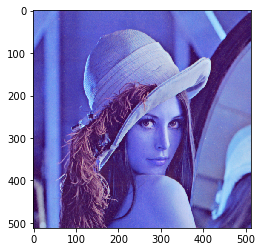

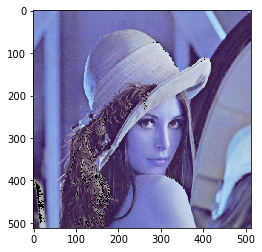

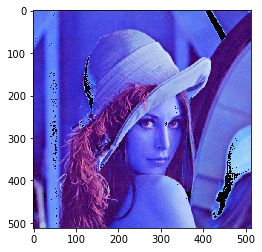

In [26]:
import matplotlib.pyplot as plt
# 組合圖片 + 顯示圖片

img_hls_change = [img, img_hls_down, img_hls_up]
for i in range(len(img_hls_change)):
    plt.imshow(img_hls_change[i])
    plt.show()
    

## 直方圖均衡

In [18]:
# 轉為灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 灰階圖片直方圖均衡
img_gray_equal = cv2.equalizeHist(img_gray)

# 組合圖片 + 顯示圖片
img_gray_equalHist = np.hstack((img_gray, img_gray_equal))
# while True:
#     # 比較灰階圖片是否有做直方圖均衡的差異
#     cv2.imshow('gray equal histogram', img_gray_equalHist)

#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

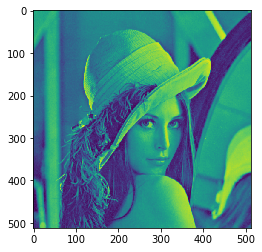

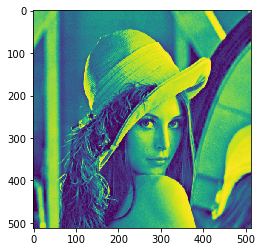

In [19]:
# 組合圖片 + 顯示圖片
img_gray_equalHist = [img_gray, img_gray_equal]

for i in range(len(img_gray_equalHist)):
    plt.imshow(img_gray_equalHist[i])
    plt.show()
    

## 調整對比 / 明亮

In [20]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
# img_contrast_light = np.hstack((img, add_contrast, add_lighness))
# while True:
#     # 比較不同程度的對比 / 明亮
#     cv2.imshow('adjust contrast and brighness', img_contrast_light)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

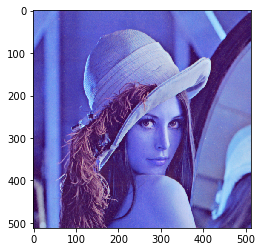

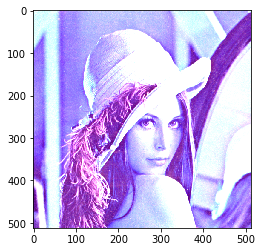

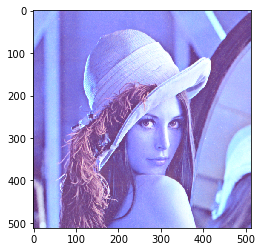

In [21]:
# 組合圖片 + 顯示圖片
img_contrast_light = [img, add_contrast, add_lighness]

for i in range(len(img_contrast_light)):
    plt.imshow(img_contrast_light[i])
    plt.show()
    